### Packages and functions

In [1]:
# for scraping data
import requests
from bs4 import BeautifulSoup

# for data/string manipulation
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# optional
import warnings
warnings.filterwarnings('ignore')

In [2]:
# function specifically for scraping data from setlsit fm data
def scrape_setlistfm(prompt, end=99999999):
    all_setlists = pd.DataFrame()
    
    for pg in range(1,end):
        page = requests.get(f'https://www.setlist.fm/search?country=au&page={pg}&query={prompt}')
        if page.status_code == 404: break #stop when page not found
        
        soup = BeautifulSoup(page.content, "html.parser")

        for setlist in soup.find_all("div", class_="col-xs-12 setlistPreview"):
            set_details = []
            set_details_clean= []

            set_details.append(setlist.find_all("div")[0].find_all("span"))
            set_details.append(setlist.find_all("div")[2].find_all("a"))

            for i in set_details:
                for ij in i:
                    if 'Edit setlist' in ij.text: break
                    else: set_details_clean.append(ij.text)

            if len(set_details_clean) == 6:
                set_details_clean.insert(5, None)

            set_details_clean.pop(3)

            setlist_df = pd.DataFrame([set_details_clean], 
                                      columns=['Month','Day','Year','Artist','Tour','Venue'])

            all_setlists = all_setlists.append(setlist_df)
        
    return all_setlists

### Fetch data through request

Use the prompt parameter to change your search request

In [3]:
df_firstpage = scrape_setlistfm(prompt='melbourne', end=2) #returns first page for melbourne events
df_firstpage.shape[0] # 10 rows

10

In [4]:
df_firstpage

,Month,Day,Year,Artist,Tour,Venue
0,Nov,19,2022,Baby Animals,30th Anniversary Tour,"Mornington Racecourse, Mornington, Australia"
0,Nov,19,2022,Ninajirachi,None,"524 Flinders, Melbourne, Australia"
0,Nov,18,2022,Alestorm,None,"Max Watt's House of Music, Melbourne, Australia"
0,Nov,18,2022,Art vs Science,None,"The Esplanade Hotel, Melbourne, Australia"
0,Nov,18,2022,Sam Fender,None,"The Palace Foreshore, Melbourne, Australia"
0,Nov,18,2022,HighSchool,None,"The Palace Foreshore, Melbourne, Australia"
0,Nov,18,2022,Hollow Coves,None,"Margaret Court Arena, Melbourne, Australia"
0,Nov,18,2022,Peter Hook & the Light,Joy Division: A Celebration,"Forum Theatre, Melbourne, Australia"
0,Nov,18,2022,The Lumineers,None,"Margaret Court Arena, Melbourne, Australia"
0,Nov,18,2022,Mickey Kojak,None,"The Esplanade Hotel, Melbourne, Australia"


Search by band (first page)

In [10]:
df_artist_firstpage = scrape_setlistfm(prompt='The Lumineers', end=2) #returns first page for artist
df_artist_firstpage

,Month,Day,Year,Artist,Tour,Venue
0,Nov,19,2022,The Lumineers,None,"Rymill & King Rodney Parks, Adelaide, Australia"
0,Nov,18,2022,The Lumineers,None,"Margaret Court Arena, Melbourne, Australia"
0,Nov,15,2022,The Lumineers,None,"Aware Super Theatre, Sydney, Australia"
0,Nov,13,2022,The Lumineers,None,"Riverstage, Brisbane, Australia"
0,Jul,22,2019,The Lumineers,None,"Enmore Theatre, Sydney, Australia"
0,Jul,21,2019,The Lumineers,None,"North Byron Parklands, Byron Bay, Australia"
0,Apr,22,2017,The Lumineers,Cleopatra World Tour,"Metro City Concert Club, Perth, Australia"
0,Apr,19,2017,The Lumineers,Cleopatra World Tour,"State Theatre, The Arts Centre, Melbourne, Aus..."
0,Apr,18,2017,The Lumineers,Cleopatra World Tour,"Concert Hall, Sydney Opera House, Sydney, Aust..."
0,Apr,17,2017,The Lumineers,Cleopatra World Tour,"Concert Hall, Sydney Opera House, Sydney, Aust..."


Search by band (all pages)

In [11]:
df_artist = scrape_setlistfm(prompt='The Lumineers') #returns all pages for australia events
print(df_artist.shape[0])

24


In [7]:
df_artist

,Month,Day,Year,Artist,Tour,Venue
0,Nov,19,2022,The Lumineers,None,"Rymill & King Rodney Parks, Adelaide, Australia"
0,Nov,18,2022,The Lumineers,None,"Margaret Court Arena, Melbourne, Australia"
0,Nov,15,2022,The Lumineers,None,"Aware Super Theatre, Sydney, Australia"
0,Nov,13,2022,The Lumineers,None,"Riverstage, Brisbane, Australia"
0,Jul,22,2019,The Lumineers,None,"Enmore Theatre, Sydney, Australia"
0,Jul,21,2019,The Lumineers,None,"North Byron Parklands, Byron Bay, Australia"
0,Apr,22,2017,The Lumineers,Cleopatra World Tour,"Metro City Concert Club, Perth, Australia"
0,Apr,19,2017,The Lumineers,Cleopatra World Tour,"State Theatre, The Arts Centre, Melbourne, Aus..."
0,Apr,18,2017,The Lumineers,Cleopatra World Tour,"Concert Hall, Sydney Opera House, Sydney, Aust..."
0,Apr,17,2017,The Lumineers,Cleopatra World Tour,"Concert Hall, Sydney Opera House, Sydney, Aust..."


Search by band in a city (all pages)

In [12]:
df_artist_melbourne = scrape_setlistfm(prompt='The Lumineers Melbourne') #returns all pages for melbourne events
print(df_artist_melbourne.shape[0])

5


In [13]:
df_artist_melbourne

,Month,Day,Year,Artist,Tour,Venue
0,Nov,18,2022,The Lumineers,None,"Margaret Court Arena, Melbourne, Australia"
0,Apr,19,2017,The Lumineers,Cleopatra World Tour,"State Theatre, The Arts Centre, Melbourne, Aus..."
0,Jan,24,2014,The Lumineers,None,"Flemington Racecourse, Melbourne, Australia"
0,Jan,23,2014,The Lumineers,None,"Palace Theatre, Melbourne, Australia"
0,Mar,29,2013,The Lumineers,None,"Corner Hotel, Melbourne, Australia"


### Visualise time series

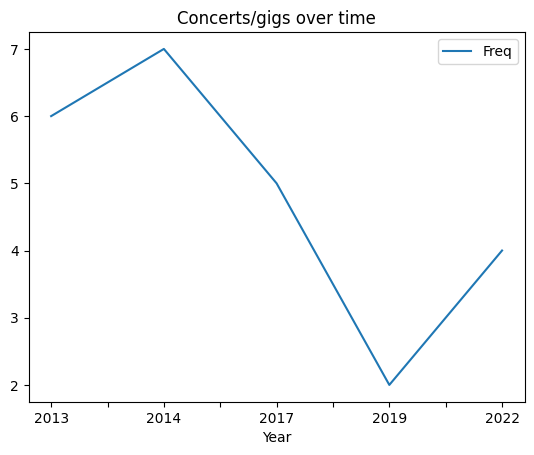

In [14]:
plt.figure(figsize=(12,6)) 

# create a frequency table of venue occurences by year
data_yearly = df_artist[['Year']]\
.value_counts()\
.reset_index()\
.groupby(['Year'])\
.sum()\
.reset_index()

# clean column names
data_yearly.columns = ['Year','Freq']

# visualise data over time
plt.plot(data_yearly["Year"],
        data_yearly["Freq"])
plt.title('Concerts/gigs over time')
plt.show()

### Download output

In [ ]:
# for downloading
from google.colab import files
df_artist.to_csv('setlistfm.csv') 
files.download('setlistfm.csv') 